In [1]:
import subprocess
import os # adding this line
os.environ["PATH"] = os.environ["PATH"]+":/usr/local/cuda/bin/" # adding this line

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)


In [2]:
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="7"


In [3]:
import pydiffvg
import torch
import skimage
import skimage.io
import random
import ttools.modules
import argparse
import math
import torchvision
import torchvision.transforms as transforms
import seaborn as sns
import pandas as pd
pydiffvg.set_print_timing(False)


In [4]:
from IPython.display import Image, HTML, clear_output
from tqdm import tqdm_notebook, tnrange
os.environ['FFMPEG_BINARY'] = 'ffmpeg'
import moviepy.editor as mvp
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
import PIL
from torchvision import utils

In [5]:
import numpy as np
import torch
import os
import PIL.ImageOps
print("Torch version:", torch.__version__)

Torch version: 1.7.1


In [6]:
#@title Load CLIP {vertical-output: true}

# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import os
import clip
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR100

# Load the model
device = torch.device('cuda')
model, preprocess = clip.load('ViT-B/32', device, jit=False)



In [7]:
device

device(type='cuda')

In [8]:
nouns = "aardvark abyssinian accelerator accordion account accountant acknowledgment acoustic acrylic act action active activity actor actress adapter addition address adjustment adult advantage advertisement advice afghanistan africa aftermath afternoon aftershave afterthought age agenda agreement air airbus airmail airplane airport airship alarm albatross alcohol algebra algeria alibi alley alligator alloy almanac alphabet alto aluminium aluminum ambulance america amount amusement anatomy anethesiologist anger angle angora animal anime ankle answer ant antarctica anteater antelope anthony anthropology apartment apology apparatus apparel appeal appendix apple appliance approval april aquarius arch archaeology archeology archer architecture area argentina argument aries arithmetic arm armadillo armchair armenian army arrow art ash ashtray asia asparagus asphalt asterisk astronomy athlete atm atom attack attempt attention attic attraction august aunt australia australian author authorisation authority authorization avenue babies baboon baby back backbone bacon badge badger bag bagel bagpipe bail bait baker bakery balance balinese ball balloon bamboo banana band bandana bangladesh bangle banjo bank bankbook banker bar barbara barber barge baritone barometer base baseball basement basin basket basketball bass bassoon bat bath bathroom bathtub battery battle bay beach bead beam bean bear beard beast beat beautician beauty beaver bed bedroom bee beech beef beer beet beetle beggar beginner begonia behavior belgian belief believe bell belt bench bengal beret berry bestseller betty bibliography bicycle bike bill billboard biology biplane birch bird birth birthday bit bite black bladder blade blanket blinker blizzard block blood blouse blow blowgun blue board boat bobcat body bolt bomb bomber bone bongo bonsai book bookcase booklet boot border botany bottle bottom boundary bow bowl bowling box boy bra brace bracket brain brake branch brand brandy brass brazil bread break breakfast breath brian brick bridge british broccoli brochure broker bronze brother brother-in-law brow brown brush bubble bucket budget buffer buffet bugle building bulb bull bulldozer bumper bun burglar burma burn burst bus bush business butane butcher butter button buzzard cabbage cabinet cable cactus cafe cake calculator calculus calendar calf call camel camera camp can canada canadian cancer candle cannon canoe canvas cap capital cappelletti capricorn captain caption car caravan carbon card cardboard cardigan care carnation carol carp carpenter carriage carrot cart cartoon case cast castanet cat catamaran caterpillar cathedral catsup cattle cauliflower cause caution cave c-clamp cd ceiling celery celeste cell cellar cello celsius cement cemetery cent centimeter century ceramic cereal certification chain chair chalk chance change channel character chard charles chauffeur check cheek cheese cheetah chef chemistry cheque cherries cherry chess chest chick chicken chicory chief child children chill chime chimpanzee chin china chinese chive chocolate chord christmas christopher chronometer church cicada cinema circle circulation cirrus citizenship city clam clarinet class claus clave clef clerk click client climb clipper cloakroom clock close closet cloth cloud cloudy clover club clutch coach coal coast coat cobweb cockroach cocktail cocoa cod coffee coil coin coke cold collar college collision colombia colon colony color colt column columnist comb comfort comic comma command commission committee community company comparison competition competitor composer composition computer condition condor cone confirmation conga congo conifer connection consonant continent control cook cooking copper copy copyright cord cork cormorant corn cornet correspondent cost cotton couch cougar cough country course court cousin cover cow cowbell crab crack cracker craftsman crate crawdad crayfish crayon cream creator creature credit creditor creek crib cricket crime criminal crocodile crocus croissant crook crop cross crow crowd crown crush cry cub cuban cucumber cultivator cup cupboard cupcake curler currency current curtain curve cushion custard customer cut cuticle cycle cyclone cylinder cymbal dad daffodil dahlia daisy damage dance dancer danger daniel dash dashboard database date daughter david day dead deadline deal death deborah debt debtor decade december decimal decision decrease dedication deer defense deficit degree delete delivery den denim dentist deodorant department deposit description desert design desire desk dessert destruction detail detective development dew diamond diaphragm dibble dictionary dietician difference digestion digger digital dill dime dimple dinghy dinner dinosaur diploma dipstick direction dirt disadvantage discovery discussion disease disgust dish distance distribution distributor diving division divorced dock doctor dog dogsled doll dollar dolphin domain donald donkey donna door dorothy double doubt downtown dragon dragonfly drain drake drama draw drawbridge drawer dream dredger dress dresser dressing drill drink drive driver driving drizzle drop drug drum dry dryer duck duckling dugout dungeon dust eagle ear earth earthquake ease east edge edger editor editorial education edward eel effect egg eggnog eggplant egypt eight elbow element elephant elizabeth ellipse emery employee employer encyclopedia end enemy energy engine engineer engineering english enquiry entrance environment epoch epoxy equinox equipment era error estimate ethernet ethiopia euphonium europe evening event examination example exchange exclamation exhaust ex-husband existence expansion experience expert explanation ex-wife eye eyebrow eyelash eyeliner face facilities fact factory fahrenheit fairies fall family fan fang farm farmer fat father father-in-law faucet fear feast feather feature february fedelini feedback feeling feet felony female fender ferry ferryboat fertilizer fiber fiberglass fibre fiction field fifth fight fighter file find fine finger fir fire fired fireman fireplace firewall fish fisherman flag flame flare flat flavor flax flesh flight flock flood floor flower flugelhorn flute fly foam fog fold font food foot football footnote force forecast forehead forest forgery fork form format fortnight foundation fountain fowl fox foxglove fragrance frame france freckle freeze freezer freighter french freon friction friday fridge friend frog front frost frown fruit fuel fur furniture galley gallon game gander garage garden garlic gas gasoline gate gateway gauge gazelle gear gearshift geese gemini gender geography geology geometry george geranium german germany ghana ghost giant giraffe girdle girl gladiolus glass glider gliding glockenspiel glove glue goal goat gold goldfish golf gondola gong good-bye goose gore-tex gorilla gosling government governor grade grain gram granddaughter grandfather grandmother grandson grape graphic grass grasshopper gray grease great-grandfather great-grandmother greece greek green grenade grey grill grip ground group grouse growth guarantee guatemalan guide guilty guitar gum gun gym gymnast hacksaw hail hair haircut half-brother half-sister halibut hall hallway hamburger hammer hamster hand handball handicap handle handsaw harbor hardboard hardcover hardhat hardware harmonica harmony harp hat hate hawk head headlight headline health hearing heart heat heaven hedge height helen helicopter helium hell helmet help hemp hen heron herring hexagon hill himalayan hip hippopotamus history hobbies hockey hoe hole holiday home honey hood hook hope horn horse hose hospital hot hour hourglass house hovercraft hub hubcap humidity humor hurricane hyacinth hydrant hydrofoil hydrogen hyena hygienic ice icebreaker icicle icon idea ikebana illegal imprisonment improvement impulse inch income increase index india indonesia industry ink innocent input insect instruction instrument insulation insurance interactive interest internet interviewer intestine invention inventory invoice iran iraq iris iron island israel italian italy jacket jaguar jail jam james january japan japanese jar jasmine jason jaw jeans jeep jeff jelly jellyfish jennifer jet jewel jogging john join joke joseph journey judge judo juice july jumbo jump jumper june jury justice jute kale kamikaze kangaroo karate karen kayak kendo kenneth kenya ketchup kettle kettledrum kevin key keyboard keyboarding kick kidney kilogram kilometer kimberly kiss kitchen kite kitten kitty knee knickers knife knight knot knowledge kohlrabi korean laborer lace ladybug lake lamb lamp lan land landmine language larch lasagna latency latex lathe laugh laundry laura law lawyer layer lead leaf learning leather leek leg legal lemonade lentil leo leopard letter lettuce level libra library license lier lift light lightning lilac lily limit linda line linen link lion lip lipstick liquid liquor lisa list literature litter liver lizard llama loaf loan lobster lock locket locust look loss lotion love low lumber lunch lunchroom lung lunge lute luttuce lycra lynx lyocell lyre lyric macaroni machine macrame magazine magic magician maid mail mailbox mailman makeup malaysia male mall mallet man manager mandolin manicure manx map maple maraca marble march margaret margin maria marimba mark mark market married mary mascara mask mass match math mattock may mayonnaise meal measure meat mechanic medicine meeting melody memory men menu mercury message metal meteorology meter methane mexican mexico mice michael michelle microwave middle mile milk milkshake millennium millimeter millisecond mimosa mind mine minibus mini-skirt minister mint minute mirror missile mist mistake mitten moat modem mole mom monday money monkey month moon morning morocco mosque mosquito mother mother-in-law motion motorboat motorcycle mountain mouse moustache mouth move multi-hop multimedia muscle museum music musician mustard myanmar nail name nancy napkin narcissus nation neck need needle neon nepal nephew nerve nest net network news newsprint newsstand nic nickel niece nigeria night nitrogen node noise noodle north north america north korea norwegian nose note notebook notify novel november number numeric nurse nut nylon oak oatmeal objective oboe observation occupation ocean ocelot octagon octave october octopus odometer offence offer office oil okra olive onion open opera operation ophthalmologist opinion option orange orchestra orchid order organ organisation organization ornament ostrich otter ounce output outrigger oval oven overcoat owl owner ox oxygen oyster package packet page pail pain paint pair pajama pakistan palm pamphlet pan pancake pancreas panda pansy panther panties pantry pants panty pantyhose paper paperback parade parallelogram parcel parent parentheses park parrot parsnip part particle partner partridge party passbook passenger passive pasta paste pastor pastry patch path patient patio patricia paul payment pea peace peak peanut pear pedestrian pediatrician peen peer-to-peer pelican pen penalty pencil pendulum pentagon peony pepper perch perfume period periodical peripheral permission persian person peru pest pet pharmacist pheasant philippines philosophy phone physician piano piccolo pickle picture pie pig pigeon pike pillow pilot pimple pin pine ping pink pint pipe pisces pizza place plain plane planet plant plantation plaster plasterboard plastic plate platinum play playground playroom pleasure plier plot plough plow plywood pocket poet point poison poland police policeman polish politician pollution polo polyester pond popcorn poppy population porch porcupine port porter position possibility postage postbox pot potato poultry pound powder power precipitation preface prepared pressure price priest print printer prison probation process processing produce product production professor profit promotion propane property prose prosecution protest protocol pruner psychiatrist psychology ptarmigan puffin pull puma pump pumpkin punch punishment puppy purchase purple purpose push pvc pyjama pyramid quail quality quart quarter quartz queen question quicksand quiet quill quilt quince quit quiver quotation rabbi rabbit racing radar radiator radio radish raft rail railway rain rainbow raincoat rainstorm rake ramie random range rat rate raven ravioli ray rayon reaction reading reason receipt recess record recorder rectangle red reduction refrigerator refund regret reindeer relation relative religion relish reminder repair replace report representative request resolution respect responsibility rest restaurant result retailer revolve revolver reward rhinoceros rhythm rice richard riddle rifle ring rise risk river riverbed road roadway roast robert robin rock rocket rod roll romania romanian ronald roof room rooster root rose rotate route router rowboat rub rubber rugby rule run russia russian rutabaga ruth sack sagittarius sail sailboat sailor salad salary sale salesman salmon salt sampan samurai sand sandra sandwich santa sarah sardine satin saturday sauce saudi arabia sausage save saw saxophone scale scallion scanner scarecrow scarf scene scent schedule school science scissors scooter scorpio scorpion scraper screen screw screwdriver sea seagull seal seaplane search seashore season seat second secretary secure security seed seeder segment select selection self semicircle semicolon sense sentence separated september servant server session sex shade shadow shake shallot shame shampoo shape share shark sharon shears sheep sheet shelf shell shield shingle ship shirt shock shoe shoemaker shop shorts shoulder shovel show shrimp shrine siamese siberian side sideboard sidecar sidewalk sign signature silica silk silver sing singer single sink sister sister-in-law size skate skiing skill skin skirt sky slash slave sled sleep sleet slice slime slip slipper slope smash smell smile smoke snail snake sneeze snow snowboarding snowflake snowman snowplow snowstorm soap soccer society sociology sock soda sofa softball softdrink software soil soldier son song soprano sort sound soup sousaphone south africa south america south korea soy soybean space spade spaghetti spain spandex spark sparrow spear specialist speedboat sphere sphynx spider spike spinach spleen sponge spoon spot spring sprout spruce spy square squash squid squirrel stage staircase stamp star start starter state statement station statistic steam steel stem step step-aunt step-brother stepdaughter step-daughter step-father step-grandfather step-grandmother stepmother step-mother step-sister stepson step-son step-uncle steven stew stick stinger stitch stock stocking stomach stone stool stop stopsign stopwatch store storm story stove stranger straw stream street streetcar stretch string structure study sturgeon submarine substance subway success sudan suede sugar suggestion suit summer sun sunday sundial sunflower sunshine supermarket supply support surfboard surgeon surname surprise susan sushi swallow swamp swan sweater sweatshirt sweatshop swedish sweets swim swimming swing swiss switch sword swordfish sycamore syria syrup system table tablecloth tabletop tachometer tadpole tail tailor taiwan talk tank tanker tanzania target taste taurus tax taxi taxicab tea teacher teaching team technician teeth television teller temper temperature temple tempo tendency tennis tenor tent territory test text textbook texture thailand theater theory thermometer thing thistle thomas thought thread thrill throat throne thumb thunder thunderstorm thursday ticket tie tiger tights tile timbale time timer timpani tin tip tire titanium title toad toast toe toenail toilet tomato tom-tom ton tongue tooth toothbrush toothpaste top tornado tortellini tortoise touch tower town toy tractor trade traffic trail train tramp transaction transmission transport trapezoid tray treatment tree trial triangle trick trigonometry trip trombone trouble trousers trout trowel truck trumpet trunk t-shirt tsunami tub tuba tuesday tugboat tulip tuna tune turkey turkey turkish turn turnip turnover turret turtle tv twig twilight twine twist typhoon tyvek uganda ukraine ukrainian umbrella uncle underclothes underpants undershirt underwear unit united kingdom unshielded use utensil uzbekistan vacation vacuum valley value van vase vault vegetable vegetarian veil vein velvet venezuela venezuelan verdict vermicelli verse vessel vest veterinarian vibraphone vietnam view vinyl viola violet violin virgo viscose vise vision visitor voice volcano volleyball voyage vulture waiter waitress walk wall wallaby wallet walrus war warm wash washer wasp waste watch watchmaker water waterfall wave wax way wealth weapon weasel weather wedge wednesday weed weeder week weight whale wheel whip whiskey whistle white wholesaler whorl wilderness william willow wind windchime window windscreen windshield wine wing winter wire wish witch withdrawal witness wolf woman women wood wool woolen word work workshop worm wound wrecker wren wrench wrinkle wrist writer xylophone yacht yak yam yard yarn year yellow yew yogurt yoke yugoslavian zebra zephyr zinc zipper zone zoo zoology"
nouns = nouns.split(" ")

nouns = None
with open('/raid/xiaoyuz1/quickdraw/category.txt', 'r') as fh:
    nouns = fh.readlines()
nouns = [s.strip() for s in nouns]
noun_prompts = ["a sketch of a " + x for x in nouns]

# Calculate features
with torch.no_grad():
    nouns_features = model.encode_text(torch.cat([clip.tokenize(noun_prompts).to(device)]))
print(nouns_features.shape, nouns_features.dtype)


torch.Size([345, 512]) torch.float16


In [9]:
resize_to_clip = transforms.Compose([
    transforms.Resize(size=224, interpolation=PIL.Image.BICUBIC),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
])

In [10]:
prompt = "A sketch of a wide candle."
text_input = clip.tokenize(prompt).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_input)

In [11]:
# img_path = os.path.join(folder, '549.png')
# pimg = PIL.Image.open(img_path)
# print(np.asarray(pimg).shape)
# resize_to_clip(pimg).shape

In [12]:
folder = "/raid/xiaoyuz1/sketch_datasets/spg/candle"
# folder = "/raid/xiaoyuz1/sketch_datasets/QuickDraw/picture_files/train/cat"
sub_files = os.listdir(folder)
print("Total number of images: ", len(sub_files))

flip = False

Total number of images:  801


In [13]:
batch_size = 8

acc = batch_size
all_batches = []
all_image_paths = []

img_augs = []
image_paths = []

start_idx = 0
end_idx = 800

for f_idx, f in enumerate(sub_files):
    
    if not f.endswith(".png"):
        continue
    
    if not(f_idx >= start_idx and f_idx < end_idx):
        continue
    
    img_path = os.path.join(folder, f)
    pimg = PIL.Image.open(img_path)
    
    image_paths.append(img_path)
    
    if(len(np.asarray(pimg).shape) < 3):
        pimg = pimg.convert(mode='RGB')
    if flip:
        pimg = PIL.ImageOps.invert(pimg)
    
    img_augs.append(resize_to_clip(pimg).unsqueeze(0))
    acc -= 1
    if f_idx == len(sub_files)-1:     
        all_batches.append(img_augs)
        all_image_paths.append(image_paths)
        break
    if acc < 1:
        acc = batch_size
        all_batches.append(img_augs)
        all_image_paths.append(image_paths)
        img_augs = [] 
        image_paths = []

In [14]:
feature_save_folder = os.path.join("/raid/xiaoyuz1/sketch_datasets/spg_features/clip", "dummy")
if not os.path.exists(feature_save_folder):
    os.mkdir(feature_save_folder)

In [15]:
print(len(all_batches))
print(len(all_image_paths))
print(text_features.shape)

99
99
torch.Size([1, 512])


In [16]:
# batch_idx = 0
# im_batch = torch.cat(all_batches[batch_idx])
# im_batch = im_batch.cuda(pydiffvg.get_device())

# image_features = model.encode_image(im_batch)
# similarity = None
# with torch.no_grad():
#     im_norm = image_features / image_features.norm(dim=-1, keepdim=True)
#     text_norm = text_features / text_features.norm(dim=-1, keepdim=True)

#     similarity = (100.0 * im_norm @ text_norm.T).softmax(dim=-1)


In [17]:
result_dict = {}
all_image_features = []
all_distance_to_text = []

batch_start_idx = start_idx / batch_size

for batch_idx in range(len(all_batches)):
    
    save_prefix = int(batch_start_idx + batch_idx)
    
    feature_path = os.path.join(feature_save_folder, '{}.npy'.format(save_prefix))
    image_name_path = os.path.join(feature_save_folder, '{}.txt'.format(save_prefix))
    with open(image_name_path, "w+") as f:
        f.write("\n".join(all_image_paths[batch_idx]))
    
    im_batch = torch.cat(all_batches[batch_idx])
    im_batch = im_batch.cuda(pydiffvg.get_device())
    
    image_features = model.encode_image(im_batch)
    all_image_features.append(image_features)
    
    with open(feature_path, 'wb') as f:
        np.save(f, image_features.detach().cpu().numpy())
    
    with torch.no_grad():
        
        a = torch.cosine_similarity(text_features, image_features, dim=1)
        all_distance_to_text.append(a.cpu().numpy())
        
        im_norm = image_features / image_features.norm(dim=-1, keepdim=True)
        noun_norm = nouns_features / nouns_features.norm(dim=-1, keepdim=True)
        
        similarity = (100.0 * im_norm @ noun_norm.T).softmax(dim=-1)

        for i in range(len(similarity)):
            values, indices = similarity[i].topk(10)
            # print("\nTop predictions:\n")
            for rank_idx,(value, index) in enumerate(zip(values, indices)):

                k1 = '{}'.format(rank_idx)
                k2 = '{}_probability'.format(rank_idx)

                if k1 not in result_dict:
                    result_dict[k1] = []
                if k2 not in result_dict:
                    result_dict[k2] = []

                result_dict[k1].append(f"{nouns[index]}")
                result_dict[k2].append(f"{100 * value.item():.2f}")

                # print(f"{nouns[index]:>16s}: {100 * value.item():.2f}%")
    

In [18]:
# df = pd.DataFrame.from_dict(result_dict)
# df

In [19]:
# preds, counts = np.unique(df['0'].to_numpy(), return_counts=True)

In [20]:
# preds[list(np.argsort(counts))]

In [21]:
# np.sort(counts)

In [22]:
# all_image_features[0].detach().cpu().numpy()

In [23]:
# (163+37) / 400

In [24]:
all_image_paths_f = np.hstack(np.asarray(all_image_paths))

In [25]:
all_dist = np.hstack(all_distance_to_text)

In [26]:
import PIL
import matplotlib.pyplot as plt

def show_img(img_paths, img_order, save_path=None):
    plt.figure(figsize = (25,200));
    
    for index, img_idx in enumerate(img_order):
        plt.subplot(80,10,index+1);
        
        file = img_paths[img_idx]
        img = PIL.Image.open(file)
        img = img.convert(mode='RGB')
        
        if flip:
            img = PIL.ImageOps.invert(img)
        
        
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
    if save_path is not None:
        plt.savefig(save_path)
    plt.close()

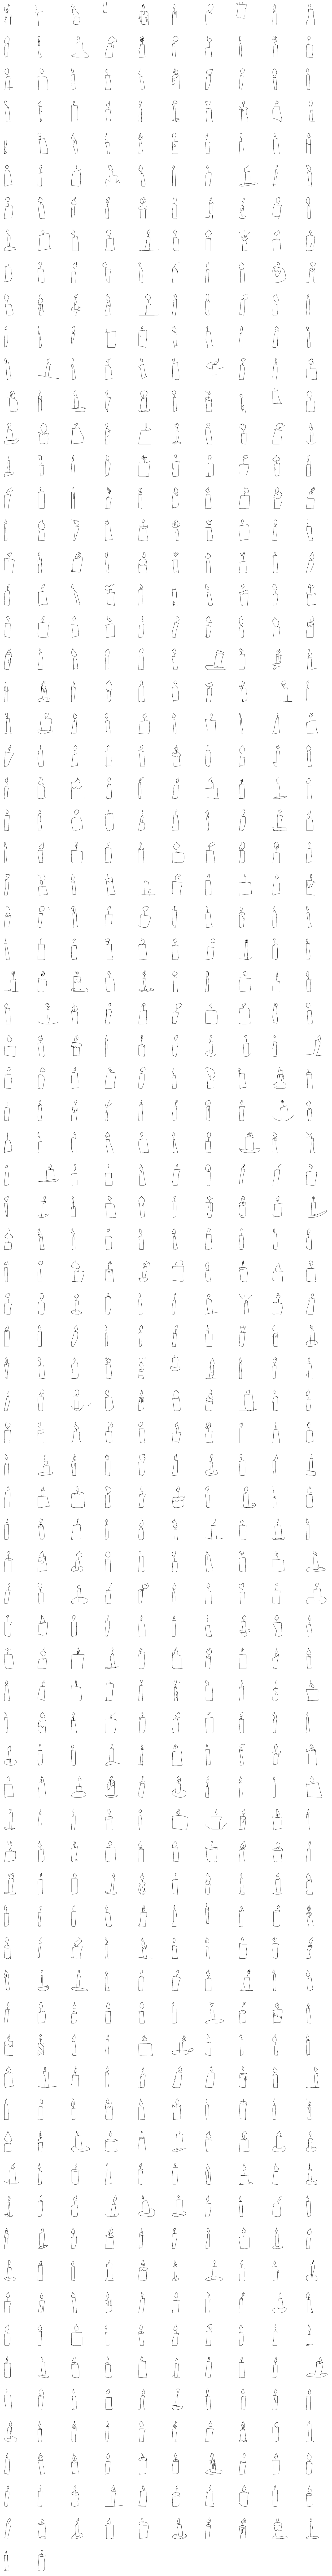

In [27]:
show_img(all_image_paths_f, np.argsort(all_dist))

In [28]:
# def scale_to_01_range(x):
#     value_range = (np.max(x) - np.min(x))
#     starts_from_zero = x - np.min(x)
#     return starts_from_zero / value_range

# tx = scale_to_01_range(tsne_results[:,0])
# ty = scale_to_01_range(tsne_results[:,1])

In [29]:
# labels = np.zeros(len(all_image_features[0]) * len(all_image_features)).astype(int)

In [30]:
# images = []
# for f_idx, f in enumerate(sub_files):
#     if f_idx >= len(labels):
#         break
    
#     img_path = os.path.join(folder, f)
#     images.append(img_path)

In [31]:
# with open('/raid/xiaoyuz1/face_x.npy', 'wb') as f:
#     np.save(f, tx)
    
# with open('/raid/xiaoyuz1/face_y.npy', 'wb') as f:
#     np.save(f, ty)   

In [32]:
# with open('/raid/xiaoyuz1/face_image_path.npy', 'wb') as f:
#     np.save(f, np.array(images))   

In [33]:
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# visualize_tsne_images(tx, ty, images, labels, plot_size=10000, max_image_size=100)

In [1]:
L = [
    'dog', 'cow', 'zebra', 'bird', 'tiger', 'sheep', \
    'rabbit', 'penguin', 'parrot', 'panda', 'monkey', 'lion', \
    'horse', 'giraffe', 'flamingo', 'fish', 'shark', 'elephant', 'dragon'
]

In [4]:
import os
with open('./extract_feat.sh', 'w+') as f:
    for file in os.listdir('/raid/xiaoyuz1/sketch_datasets/QuickDraw/picture_files/train'):
        
        if file not in L:
            continue
        
        for start,end in zip([0,200,400,600],[200,400,600,800]):
            fdr1 = os.path.join('/raid/xiaoyuz1/sketch_datasets/QuickDraw/picture_files/train', file)
            fdr2 = os.path.join('/raid/xiaoyuz1/sketch_datasets/QuickDraw_features/clip', file)
            line = "python extract_clip_features.py --folder {} --feature_save_folder {} --start_idx {} --end_idx {} --flip 1\n".format(fdr1,fdr2,start,end)
            f.write(line)